<a href="https://colab.research.google.com/github/jabedkhanjb/Facial-Exrpression-Recognition-Project/blob/main/Facial_Expression_Recognition_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facial Expression Recognition with Pytorch

## Dataset Link
https://www.kaggle.com/jonathanoheix/face-expression-recognition-dataset

### Install Libraries, Packages and dataset

In [1]:
!git clone https://github.com/parth1620/Facial-Expression-Dataset.git

Cloning into 'Facial-Expression-Dataset'...
remote: Enumerating objects: 34052, done.
remote: Total 34052 (delta 0), reused 0 (delta 0), pack-reused 34052
Receiving objects: 100% (34052/34052), 52.31 MiB | 23.97 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Updating files: 100% (35887/35887), done.


In [2]:
!pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-05miy_5m
  Running command git clone --filter=blob:none --quiet https://github.com/albumentations-team/albumentations /tmp/pip-req-build-05miy_5m
  Resolved https://github.com/albumentations-team/albumentations to commit 82818a0c4a80924d9f903a656c7f549ec6ca9cb2
  Preparing metadata (setup.py) ... done


In [3]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 16.5 MB/s eta 0:00:00


In [4]:
!pip install --upgrade opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.3/68.3 MB 7.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.8.0.76
    Uninstalling opencv-contrib-python-4.8.0.76:
      Successfully uninstalled opencv-contrib-python-4.8.0.76


# Imports

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import torch

In [12]:
TRAIN_IMG_FOLDER_PATH = "/content/Facial-Expression-Dataset/train"
VALID_IMG_FOLDER_PATH = "/content/Facial-Expression-Dataset/validation"

In [30]:
LR = 0.001
BATCH_SIZE = 32
EPOCHS = 15

DEVICE = 'cpu'
MODEL_NAME = 'efficientnet_b0'

Above this part is very important to conduct the whole project, we can change any parameter from this part to conduct our entire model better than before.

### Load Dataset

In [14]:
from torchvision.datasets import ImageFolder
from torchvision import transforms as T

In [15]:
train_augs = T.Compose([
    T.RandomHorizontalFlip(p = 0.5),
    T.RandomRotation(degrees=(-20, +20)),
    T.ToTensor() #PIL / numpy arr -> torch tensor -> (h, w, c) -> (c, h, w)
])

valid_augs = T.Compose([
    T.ToTensor()
])

In [16]:
trainset = ImageFolder(TRAIN_IMG_FOLDER_PATH, transform = train_augs)
validset = ImageFolder(VALID_IMG_FOLDER_PATH, transform = train_augs)

In [17]:
len(trainset)

28821

In [18]:
len(validset)

7066

In [19]:
print(f"""
    The total number of datasets is {len(trainset) + len(validset)},
    where the training dataset has {len(trainset)} examples,
    and the validation dataset has {len(validset)} examples.
    """)



    The total number of datasets is 35887,
    where the training dataset has 28821 examples,
    and the validation dataset has 7066 examples.
    


### Plot the images

In [20]:
print(trainset.class_to_idx)

{'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


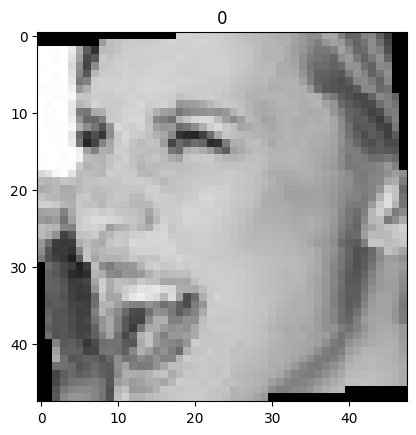

In [21]:
image, label = trainset[14]
plt.imshow(image.permute(1,2,0)) #(image comes up with height, width and channel)
plt.title(label);

Here, we see a '0' in the title of the image, which represents the facial expression of the expression depicted in the image.

## Load Dataset into Batches

In [22]:
from torch.utils.data import DataLoader

In [23]:
trainloader = DataLoader(trainset, batch_size = BATCH_SIZE, shuffle=True)
validloader = DataLoader(validset, batch_size = BATCH_SIZE)

In [24]:
print(f"Total number of batches in trainloader : {len(trainloader)}")
print(f"Total number of batches in validloader : {len(validloader)}")

Total number of batches in trainloader : 901
Total number of batches in validloader : 221


In [25]:
for images, labels in trainloader:
    break;

print(f"One image batch shape {images.shape}")
print(f"One image batch shape {labels.shape}")

One image batch shape torch.Size([32, 3, 48, 48])
One image batch shape torch.Size([32])


Here, We can see One image batch shape is 32, 3, 48, 48 which means 32 is the number of images according to the batch size which has been declared before along with "BATCH_SIZE, EPOCS......", 3 is the number of channel and 48, 48 is the height and width

# Create Model

In [26]:
import timm
from torch import nn

In [27]:
class FaceModel(nn.Module):
    def __init__(self):
        super(FaceModel, self).__init__()
        self.eff_net = timm.create_model('efficientnet_b0', pretrained = True, num_classes = 7)

    def forward(self, images, labels = None):
        logits = self.eff_net(images)

        if labels != None:
            loss = nn.CrossEntropyLoss()(logits, labels)
            return logits, loss
        return logits

In [31]:
model = FaceModel()
model.to(DEVICE)

FaceModel(
  (eff_net): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (conv_pw): Conv2d(32, 16, kernel_size=(1, 

# Create Train and Evaluate Function

In [32]:
from tqdm import tqdm

In [33]:
def multiclass_accuracy(y_pred, y_true):
    top_p, top_class = y_pred.topk(1, dim = 1)
    equals = top_class == y_true.view(*top_class.shape)
    return torch.mean(equals.type(torch.FloatTensor))

In [34]:
def train_fn(model, dataloader, optimizer, current_epo):

    model.train()
    total_loss = 0.0
    total_acc = 0.0
    tk = tqdm(dataloader, desc= "EPOCH" + "[TRAIN]" + str(current_epo + 1)+ "/" + str(EPOCHS))

    for t, data in enumerate(tk):
        images, labels = data
        image, labels = images.to(DEVICE), labels.to(DEVICE)

        optimizer.zero_grad()
        logits, loss = model(images, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits, labels)
        tk.set_postfix({'loss' : "%6f" %float(total_loss / (t+1)), 'acc' : "%6f" %float(total_acc / (t+1)),})

    return total_loss / len(dataloader), total_acc / len(dataloader)


In [35]:
def eval_fn(model, dataloader, current_epo):

    model.eval()
    total_loss = 0.0
    total_acc = 0.0
    tk = tqdm(dataloader, desc= "EPOCH" + "[VALID]" + str(current_epo + 1)+ "/" + str(EPOCHS))

    for t, data in enumerate(tk):
        images, labels = data
        image, labels = images.to(DEVICE), labels.to(DEVICE)

        logits, loss = model(images, labels)

        total_loss += loss.item()
        total_acc += multiclass_accuracy(logits, labels)
        tk.set_postfix({'loss' : "%6f" %float(total_loss / (t+1)), 'acc' : "%6f" %float(total_acc / (t+1)),})

    return total_loss / len(dataloader), total_acc / len(dataloader)

# Create Training Loop

In [36]:
optimizer = torch.optim.Adam(model.parameters(), lr = LR)

In [37]:
best_valid_loss = np.Inf

for i in range(EPOCHS):
    train_loss, train_acc = train_fn(model, trainloader, optimizer, i) # "i" is the current epoch
    valid_loss, valid_acc = eval_fn(model, validloader, i)

    if valid_loss < best_valid_loss:
        torch.save(model.state_dict(), "best-weights.pt")
        print("SAVED-BEST-WEIGHTS")

EPOCH[VALID]1/15: 100%|██████████| 221/221 [00:37<00:00,  5.87it/s, loss=1.363459, acc=0.484859]


SAVED-BEST-WEIGHTS


EPOCH[VALID]2/15: 100%|██████████| 221/221 [00:39<00:00,  5.64it/s, loss=1.254771, acc=0.521765]


SAVED-BEST-WEIGHTS


EPOCH[VALID]3/15: 100%|██████████| 221/221 [00:36<00:00,  6.06it/s, loss=1.165015, acc=0.561956]


SAVED-BEST-WEIGHTS


EPOCH[VALID]4/15: 100%|██████████| 221/221 [00:38<00:00,  5.78it/s, loss=1.121384, acc=0.577445]


SAVED-BEST-WEIGHTS


EPOCH[VALID]5/15: 100%|██████████| 221/221 [00:37<00:00,  5.88it/s, loss=1.101105, acc=0.581132]


SAVED-BEST-WEIGHTS


EPOCH[VALID]6/15: 100%|██████████| 221/221 [00:37<00:00,  5.90it/s, loss=1.090082, acc=0.591890]


SAVED-BEST-WEIGHTS


EPOCH[VALID]7/15: 100%|██████████| 221/221 [00:39<00:00,  5.58it/s, loss=1.115953, acc=0.582568]


SAVED-BEST-WEIGHTS


EPOCH[VALID]8/15: 100%|██████████| 221/221 [00:40<00:00,  5.40it/s, loss=1.088942, acc=0.608576]


SAVED-BEST-WEIGHTS


EPOCH[VALID]9/15: 100%|██████████| 221/221 [00:41<00:00,  5.37it/s, loss=1.107637, acc=0.592053]


SAVED-BEST-WEIGHTS


EPOCH[VALID]10/15: 100%|██████████| 221/221 [00:38<00:00,  5.73it/s, loss=1.047524, acc=0.614732]


SAVED-BEST-WEIGHTS


EPOCH[VALID]11/15: 100%|██████████| 221/221 [00:38<00:00,  5.77it/s, loss=1.006338, acc=0.632168]


SAVED-BEST-WEIGHTS


EPOCH[VALID]12/15: 100%|██████████| 221/221 [00:39<00:00,  5.55it/s, loss=1.022625, acc=0.623075]


SAVED-BEST-WEIGHTS


EPOCH[VALID]13/15: 100%|██████████| 221/221 [00:37<00:00,  5.89it/s, loss=1.018280, acc=0.625130]


SAVED-BEST-WEIGHTS


EPOCH[VALID]14/15: 100%|██████████| 221/221 [00:40<00:00,  5.49it/s, loss=1.031037, acc=0.622901]


SAVED-BEST-WEIGHTS


EPOCH[VALID]15/15: 100%|██████████| 221/221 [00:37<00:00,  5.82it/s, loss=1.009694, acc=0.633647]


SAVED-BEST-WEIGHTS
